# EE16A: Homework 3

In [17]:
%matplotlib inline
from numpy import zeros, cos, sin, arange, around, hstack
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle
import numpy as np
from scipy.interpolate import interp1d
import scipy as sp
import wave
import scipy.io.wavfile
import operator
from IPython.display import Audio

## Problem 2: Elementary Matrices

## Part (b)

In [19]:
## YOUR CODE HERE

E_1 = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 0, -1]
])

E_2 = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [2, 7, 1, -5],
    [0, 0, 0, 1]
])

E_3 = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, -3],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

E_4 = np.array([
    [1, 2, 0, 5],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

E = np.matmul(np.matmul(E_4, E_3), np.matmul(E_2, E_1))

print(E)

[[ 1  1  0  1]
 [ 0 -2  0  3]
 [ 2  2  1  5]
 [ 0  1  0 -1]]


## Problem 3: Mechanical Inverses

## Part (d)

In [3]:
def rotation_matrix(v, theta):
    """
    Inputs:
        v: Numpy array with an x- and y-component.
        theta: Float. 
    Returns:
        Numpy array with an x- and y-component. 
    """
    A = np.array([[np.cos(theta), -np.sin(theta)],
                 [np.sin(theta), np.cos(theta)]])
    return A.dot(v)

def plot_rotation_matrix(v, theta):
    """
    Inputs:
        v: Numpy array with an x- and y-component.
        theta: Float.
    Returns:
        None.
    """
    # plotting the transformation
    origin = [0], [0]
    u = rotation_matrix(v, theta)
    plt.axis('equal')
    plt.quiver(*origin, [u[0], v[0]], [u[1], v[1]], color=['r', 'b'], scale=1, units='xy')
    
    # setting appropriate plot boundaries 
    boundary = np.linalg.norm(v)*2
    plt.xlim(-boundary, boundary)
    plt.ylim(-boundary, boundary)
    
    # plot cleanliness
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    return

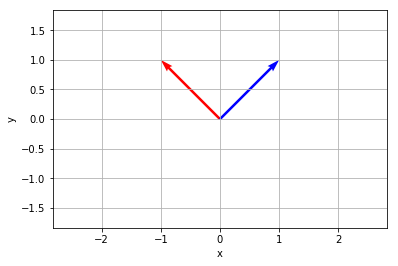

In [4]:
# Change v and theta to see how the rotation operation affects it
v = np.array([1, 1])
theta = np.pi/2

plot_rotation_matrix(v, theta)

## Problem 6: Audio File Matching

This notebook continues the audio file matching problem. Be sure to have song.wav and clip.wav in the same directory as the notebook.

In this notebook, we will look at the problem of searching for a small audio clip inside a song.

The song "Mandelbrot Set" by Jonathan Coulton is licensed under <a href="http://creativecommons.org/licenses/by-nc/3.0/">CC BY-NC 3.0</a>

In [6]:
given_file = 'song.wav'
target_file = 'clip.wav'
rate_given,  given_signal  = scipy.io.wavfile.read(given_file)
rate_target, target_signal = scipy.io.wavfile.read(target_file)
given_signal  = given_signal[:2000000].astype(float)
target_signal = target_signal.astype(float)
def play_clip(start, end, signal=given_signal):
    return Audio(data=signal[start:end], rate=rate_given)

def run_comparison(target_signal, given_signal, idxs=None):
    # Run everything if not called with idxs set to something
    if idxs is None:
        idxs = [i for i in range(len(given_signal)-len(target_signal))]
    return idxs, [vector_compare(target_signal, given_signal[i:i+len(target_signal)])
                for i in idxs]

play_clip(0, len(given_signal),given_signal)

#scipy.io.wavfile.write(target_file, rate_given, (-0.125*given_signal[1380000:1380000+70000]).astype(np.int16))

We will load the song into the variable `given_signal` and load the short clip into the variable `target_signal`. Your job is to finish code that will identify the short clip's location in the song. The clip we are trying to find will play after executing the following block.

In [8]:
play_clip(0, len(target_signal),signal=target_signal)

## Part (d)

Run the following cell. Do your results here make sense given your answers to previous parts of the problem?  What is the function `vector_compare` doing?

In [9]:
def vector_compare(desired_vec, test_vec):
    """This function compares two vectors, returning a number.
    The test vector with the highest return value is regarded as being closest to the desired vector."""
    return np.dot(desired_vec.T, test_vec)/(np.linalg.norm(desired_vec)*np.linalg.norm(test_vec)+1.e-10)

print("PART A:")
print(vector_compare(np.array([1,1,1]), np.array([1,1,1])))
print(vector_compare(np.array([1,1,1]), np.array([-1,-1,-1])))
print("PART C:")
print(vector_compare(np.array([1,2,3]), np.array([1,2,3])))
print(vector_compare(np.array([1,2,3]), np.array([2,3,4])))
print(vector_compare(np.array([1,2,3]), np.array([3,4,5])))
print(vector_compare(np.array([1,2,3]), np.array([4,5,6])))
print(vector_compare(np.array([1,2,3]), np.array([5,6,7])))
print(vector_compare(np.array([1,2,3]), np.array([6,7,8])))

PART A:
0.9999999999666668
-0.9999999999666668
PART C:
0.9999999999928572
0.9925833339660043
0.9827076298202766
0.9746318461941077
0.968329663729021
0.9633753381636556


Run the following code that runs `vector_compare` on every subsequence in the song- it will probably take at least 5 minutes. How do you interpret this plot to find where the clip is in the song?

That took 2.06 minutes to run


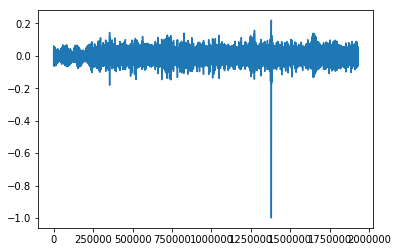

In [10]:
import time

t0 = time.time()
idxs, song_compare = run_comparison(target_signal, given_signal)
t1 = time.time()
plt.plot(idxs, song_compare)
print ("That took %(time).2f minutes to run" % {'time':(t1-t0)/60.0} )

## Part (e)
The code below uses `song_compare` to print the index of `given_signal` where `target_signal` begins. 
Can you interpret how the code finds `index`?
Verify that the code is correct by playing the song at that index using the `play_clip` function.

In [20]:
index, value = max(enumerate([abs(i) for i in song_compare]), key=operator.itemgetter(1))
print (index)
play_clip(index,index+len(target_signal))

1380000
